In [1]:
# importing the requisite libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### 1.1 Simple Linear Regression

In [3]:
#Reading the dataset

df= pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/098bb2e9-83fb-48df-9dd1-fac56fbb25ca/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data = df[['TV','Sales']]
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


<Axes: xlabel='TV', ylabel='Sales'>

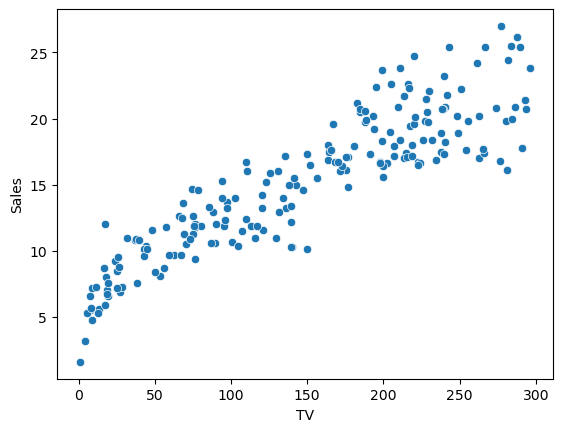

In [6]:
## Plotting a scatter plot
sns.scatterplot(data = data,x ='TV',y='Sales')

In [12]:
#Splitting the dataset into X and y

X = np.array(data['TV']).reshape(-1,1) #predictor variable
y = np.array(data['Sales']).reshape(-1,1)

In [13]:
#Building the regression model
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [14]:
#Predictions on the basis of the model
y_pred = reg.predict(X)

In [16]:
#Find the value of r squared
r2_score(y, y_pred)
#The advertising spends on TV explain about 81.21% of the variation in the Sales

0.8121757029987414

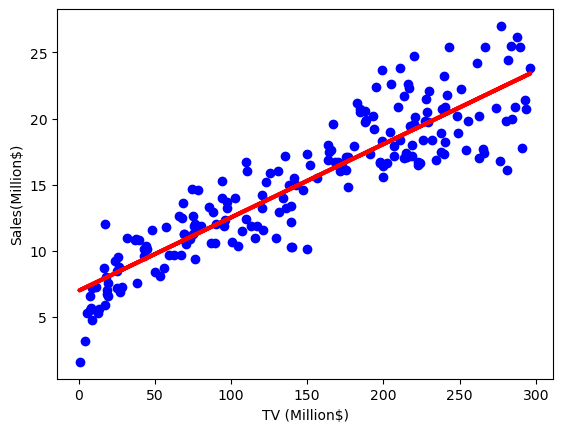

In [17]:
#Visualizing the model fit
plt.scatter(X,y, color='blue')
plt.plot(X,y_pred,color='red',linewidth =3)
plt.xlabel('TV (Million$)')
plt.ylabel('Sales(Million$)')
plt.show()

In [18]:
#Model Coefficients: beta0 and beta1
print(reg.intercept_)
reg.coef_

[6.97482149]


array([[0.05546477]])

In [20]:
#Metrics to assess model performance
rss = np.sum(np.square(y-y_pred))
print(rss)
mse = mean_squared_error(y,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

1043.5487795590257
5.2177438977951285
2.2842381438447106


### Normal Equations

In [21]:
#Computing X and Y
X = data['TV'].values
Y = data['Sales'].values

In [22]:
#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
n = len(X)

In [23]:
#Using the formula to calculate 'b0' and 'b1'
numer=0
denom =0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1 = numer/denom
b0 = mean_y -(b1*mean_x)

#Printing coefficients
print('Coefficients')
print(b0,b1)

Coefficients
6.974821488229903 0.05546477046955879


### Linear Regression Model Estimates using Matrix Multiplications

In [31]:
#We use Numpy's vstack to create a 2-d numpy array 
X_mat = np.vstack((np.ones(len(X)),X)).T

In [32]:
X_mat

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

In [33]:
Y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [34]:
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)

In [35]:
beta_hat

array([6.97482149, 0.05546477])

### These are the same coefficients that we got using normal equations

In [36]:
#Metrics to assess model performance
rss = np.sum(np.square(y-y_pred))
print(rss)
mse = mean_squared_error(y,y_pred)
print(mse)
rmse= np.sqrt(mse)
print(rmse)

1043.5487795590257
5.2177438977951285
2.2842381438447106


#### Checking for assumptions

In [37]:
#residual analysis
y_res = y - y_pred

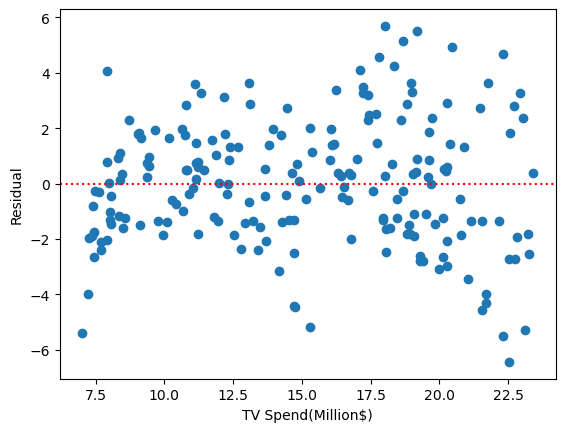

In [40]:
#Residual vs Prediction plot
data['res'] = y_res
plt.scatter(y_pred,data['res'])
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel('TV Spend(Million$)')
plt.ylabel('Residual')
plt.show()

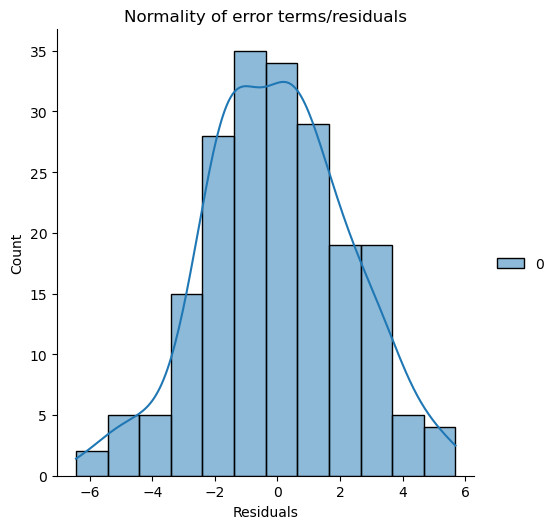

In [41]:
#Distribution of errors
p = sns.displot(y_res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel('Residuals')
plt.show()

### 1.2 Multiple Linear Regression

#### We predict the sales based on the expenditure on TV,Radio and Newspaper advertisement

In [42]:
#Reading the dataset
df= pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/098bb2e9-83fb-48df-9dd1-fac56fbb25ca/advertising.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [44]:
#Inspecting the dataset
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [45]:
data = df.copy()

<Axes: xlabel='TV', ylabel='Sales'>

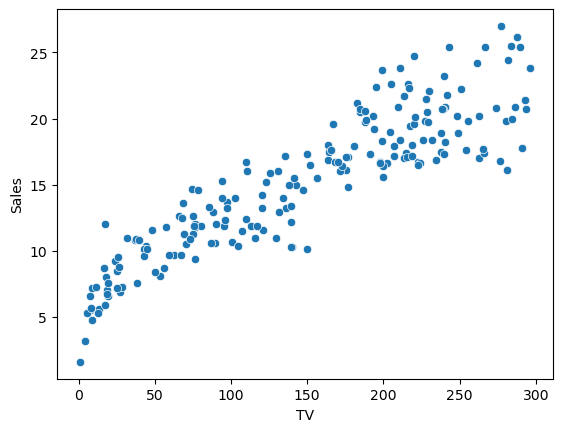

In [46]:
#Plotting a scatter plot
sns.scatterplot(data=data,x='TV',y='Sales')

<Axes: xlabel='Radio', ylabel='Sales'>

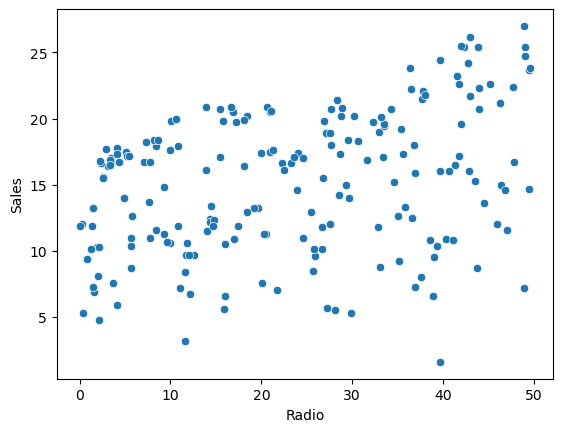

In [47]:
#Plotting a scatter plot
sns.scatterplot(data=data,x='Radio',y='Sales')

<Axes: xlabel='Newspaper', ylabel='Sales'>

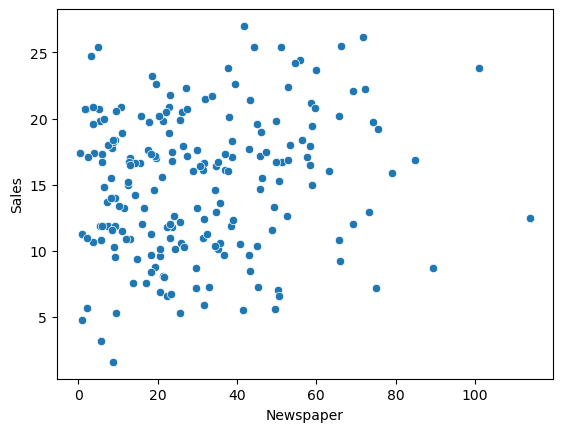

In [48]:
#Plotting a scatter plot
sns.scatterplot(data=data,x='Newspaper',y='Sales')

In [50]:
##Splitting the dataset into X and y
X = data[['TV','Newspaper','Radio']]
y = np.array(data['Sales']).reshape(-1,1)

In [51]:
#Building the regression model
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [52]:
#Predictions on the basis of the model
y_pred = reg.predict(X)

In [53]:
#Finding the value of r squared
r2_score(y,y_pred)

0.9025912899684558

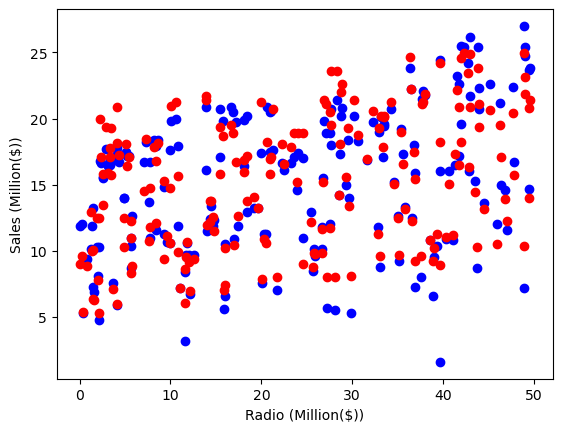

In [55]:
#Visual comparison between predicted and actual values
plt.scatter(X['Radio'],y,color='blue')
plt.scatter(X['Radio'],y_pred,color='red')
plt.xlabel('Radio (Million($))')
plt.ylabel('Sales (Million($))')
plt.show()

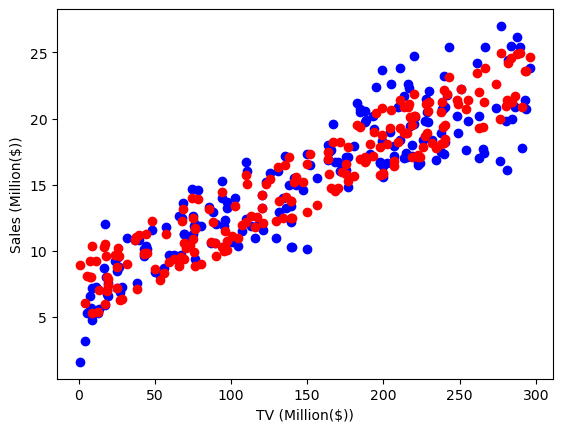

In [56]:
#Visual comparison between predicted and actual values
plt.scatter(X['TV'],y,color='blue')
plt.scatter(X['TV'],y_pred,color='red')
plt.xlabel('TV (Million($))')
plt.ylabel('Sales (Million($))')
plt.show()

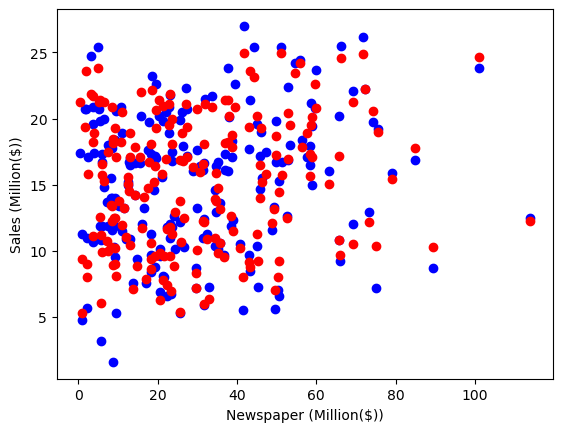

In [57]:
#Visual comparison between predicted and actual values
plt.scatter(X['Newspaper'],y,color='blue')
plt.scatter(X['Newspaper'],y_pred,color='red')
plt.xlabel('Newspaper (Million($))')
plt.ylabel('Sales (Million($))')
plt.show()

In [58]:
#calculate the beta coefficients
print(reg.intercept_)
reg.coef_

[4.62512408]


array([[0.05444578, 0.00033566, 0.10700123]])

In [60]:
#Metrics to give an overall sense of error in the model
rss =np.sum(np.square(y -y_pred))
print(rss)
mse = mean_squared_error(y,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

541.2012295254631
2.706006147627315
1.6449942697855562


In [62]:
#residual analysis
y_res = y -y_pred

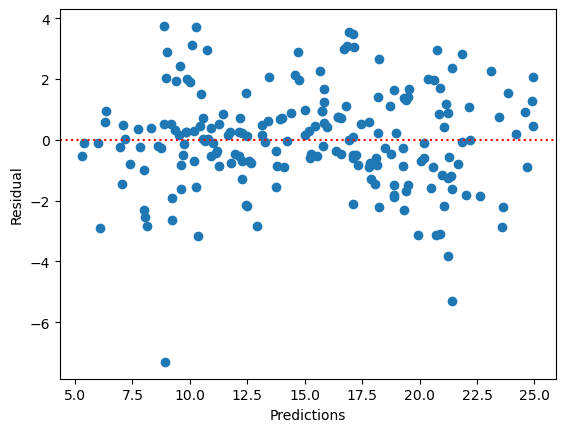

In [63]:
data['res'] = y_res
plt.scatter(y_pred,data['res'])
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.show()

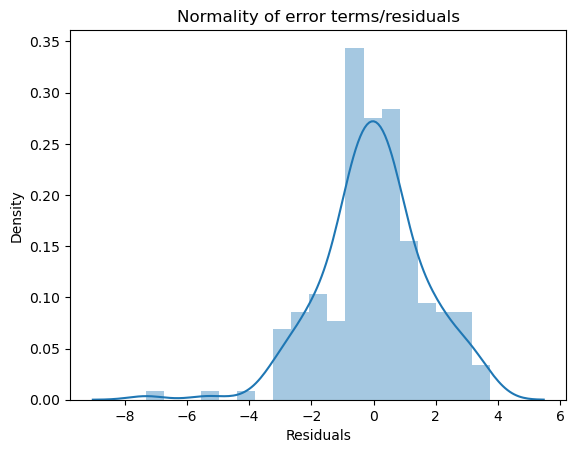

In [64]:
#Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel('Residuals')
plt.show()

### Linear Regression Model Estimates using Matrix Multiplications

In [65]:
X_mat = np.vstack((np.ones(len(X)),X.T)).T

In [66]:
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)

In [73]:
beta_hat.flatten()[]

array([4.62512408e+00, 5.44457803e-02, 3.35657922e-04, 1.07001228e-01])

In [77]:
l =['Intercept','TV', 'Newspaper', 'Radio']

In [79]:
pd.DataFrame({'Variables':l,
            'Coeff':beta_hat.flatten()})

,Variables,Coeff
0,Intercept,4.625124
1,TV,0.054446
2,Newspaper,0.000336
3,Radio,0.107001
